<a href="https://colab.research.google.com/github/AslauAlexandru/Week-10-Headstarter-Accelerator-Project-10-Market-Anomaly-Detection/blob/main/Week_10_Headstarter_Accelerator_Project_10_Market_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10 Headstarter Acceleator Project 10 Market Anomaly Detection

Week 10: Headstarter Acceleator Project 10 Market Anomaly Detection



# Milestone 1

In [1]:
'''
#Link to dataset: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

!kaggle datasets download -d mathchi/churn-for-bank-customers
!unzip /content/churn-for-bank-customers.zip
!rm /content/churn-for-bank-customers.zip

'''

'\n#Link to dataset: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers\n\n!kaggle datasets download -d mathchi/churn-for-bank-customers\n!unzip /content/churn-for-bank-customers.zip\n!rm /content/churn-for-bank-customers.zip\n\n'

In [2]:
'''
!pip install scikit-learn --upgrade --force-reinstall  # Force reinstall to ensure compatibility
!pip install xgboost --upgrade

'''

'\n!pip install scikit-learn --upgrade --force-reinstall  # Force reinstall to ensure compatibility\n!pip install xgboost --upgrade\n\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Customer Churn Prediction with Machine Learning

In [4]:
df=pd.read_csv('/content/FinancialMarketData.csv')
#df=pd.read_csv('/content/FinancialMarketData.xlsx - EWS.csv')

In [5]:
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [6]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [8]:
df.columns

Index(['Y', 'Data', 'XAU BGNL', 'ECSURPUS', 'BDIY', 'CRY', 'DXY', 'JPY', 'GBP',
       'Cl1', 'VIX', 'USGG30YR', 'GT10', 'USGG2YR', 'USGG3M', 'US0001M',
       'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'EONIA', 'GTITL30YR', 'GTITL10YR',
       'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP30Y',
       'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU',
       'LG30TRUU', 'LP01TREU', 'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP',
       'MXBR', 'MXRU', 'MXIN', 'MXCN'],
      dtype='object')

In [9]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,10))
#sns.heatmap(df.corr(),annot=True)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Abnormal risk/crisis: Y=1 if abnormal risk/crisis, Y=0 othersewise')

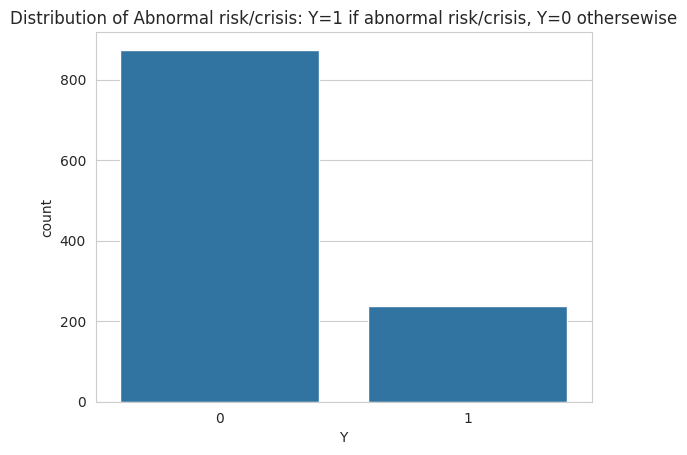

In [10]:
sns.countplot(x='Y',data=df)
plt.title('Distribution of Abnormal risk/crisis: Y=1 if abnormal risk/crisis, Y=0 othersewise')

Text(0.5, 1.0, 'GBP Distribution')

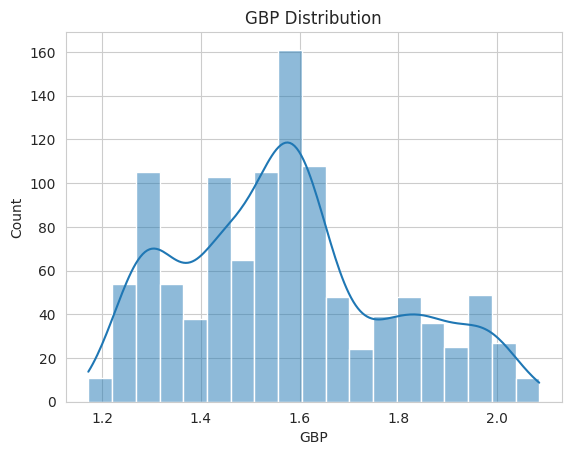

In [11]:
sns.histplot(x='GBP',data=df, kde=True)
plt.title('GBP Distribution')

Text(0.5, 1.0, 'GBP vs USGG30YR')

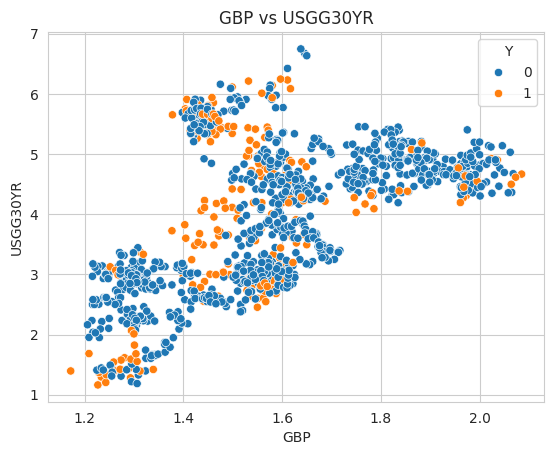

In [12]:
sns.scatterplot(data=df, x='GBP',y='USGG30YR',hue='Y')
plt.title('GBP vs USGG30YR')

Text(0.5, 1.0, 'GBP by Abnormal risk/crisis (Y=1 if abnormal risk/crisis, Y=0 othersewise)')

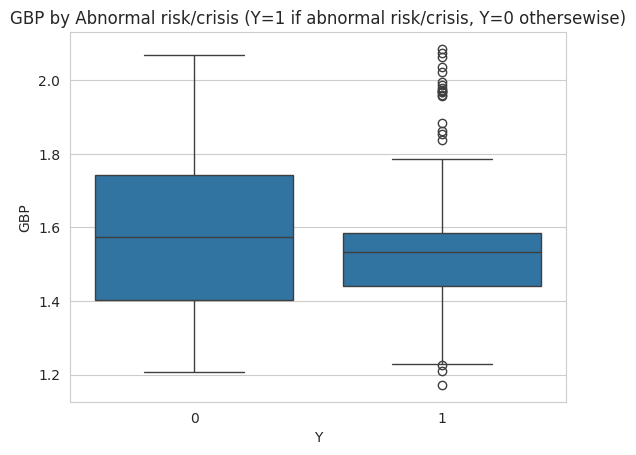

In [13]:
sns.boxplot(data=df, x='Y',y='GBP')
plt.title('GBP by Abnormal risk/crisis (Y=1 if abnormal risk/crisis, Y=0 othersewise)')

Text(0.5, 1.0, 'USGG30YR by Abnormal risk/crisis (Y=1 if abnormal risk/crisis, Y=0 othersewise)')

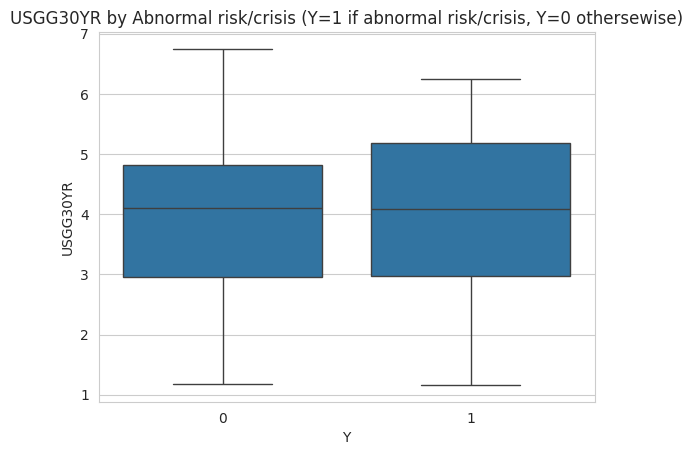

In [14]:
sns.boxplot(data=df, x='Y',y='USGG30YR')
plt.title('USGG30YR by Abnormal risk/crisis (Y=1 if abnormal risk/crisis, Y=0 othersewise)')

In [15]:
features=df.drop('Y',axis=1)

In [16]:
features

,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [17]:
target=df['Y']

In [18]:
target

,Y
0,0
1,0
2,0
3,0
4,1
...,...
1106,0
1107,0
1108,0
1109,0


In [19]:
features=df.drop(['Data', 'Y'],axis=1)

In [20]:
features

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,6.6710,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,6.7470,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,6.6340,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,6.4230,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,6.2310,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,2.3264,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,2.3687,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,2.3230,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,16.65,2.2939,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [21]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(features, target)
print(X_selected.shape)

# Get the selected feature names
selected_feature_names = features.columns[fs.get_support()]
print(selected_feature_names) # Print the names of selected features

(1111, 10)
Index(['VIX', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'LF98TRUU', 'LG30TRUU',
       'LP01TREU', 'MXUS', 'MXEU', 'MXJP'],
      dtype='object')


<Axes: >

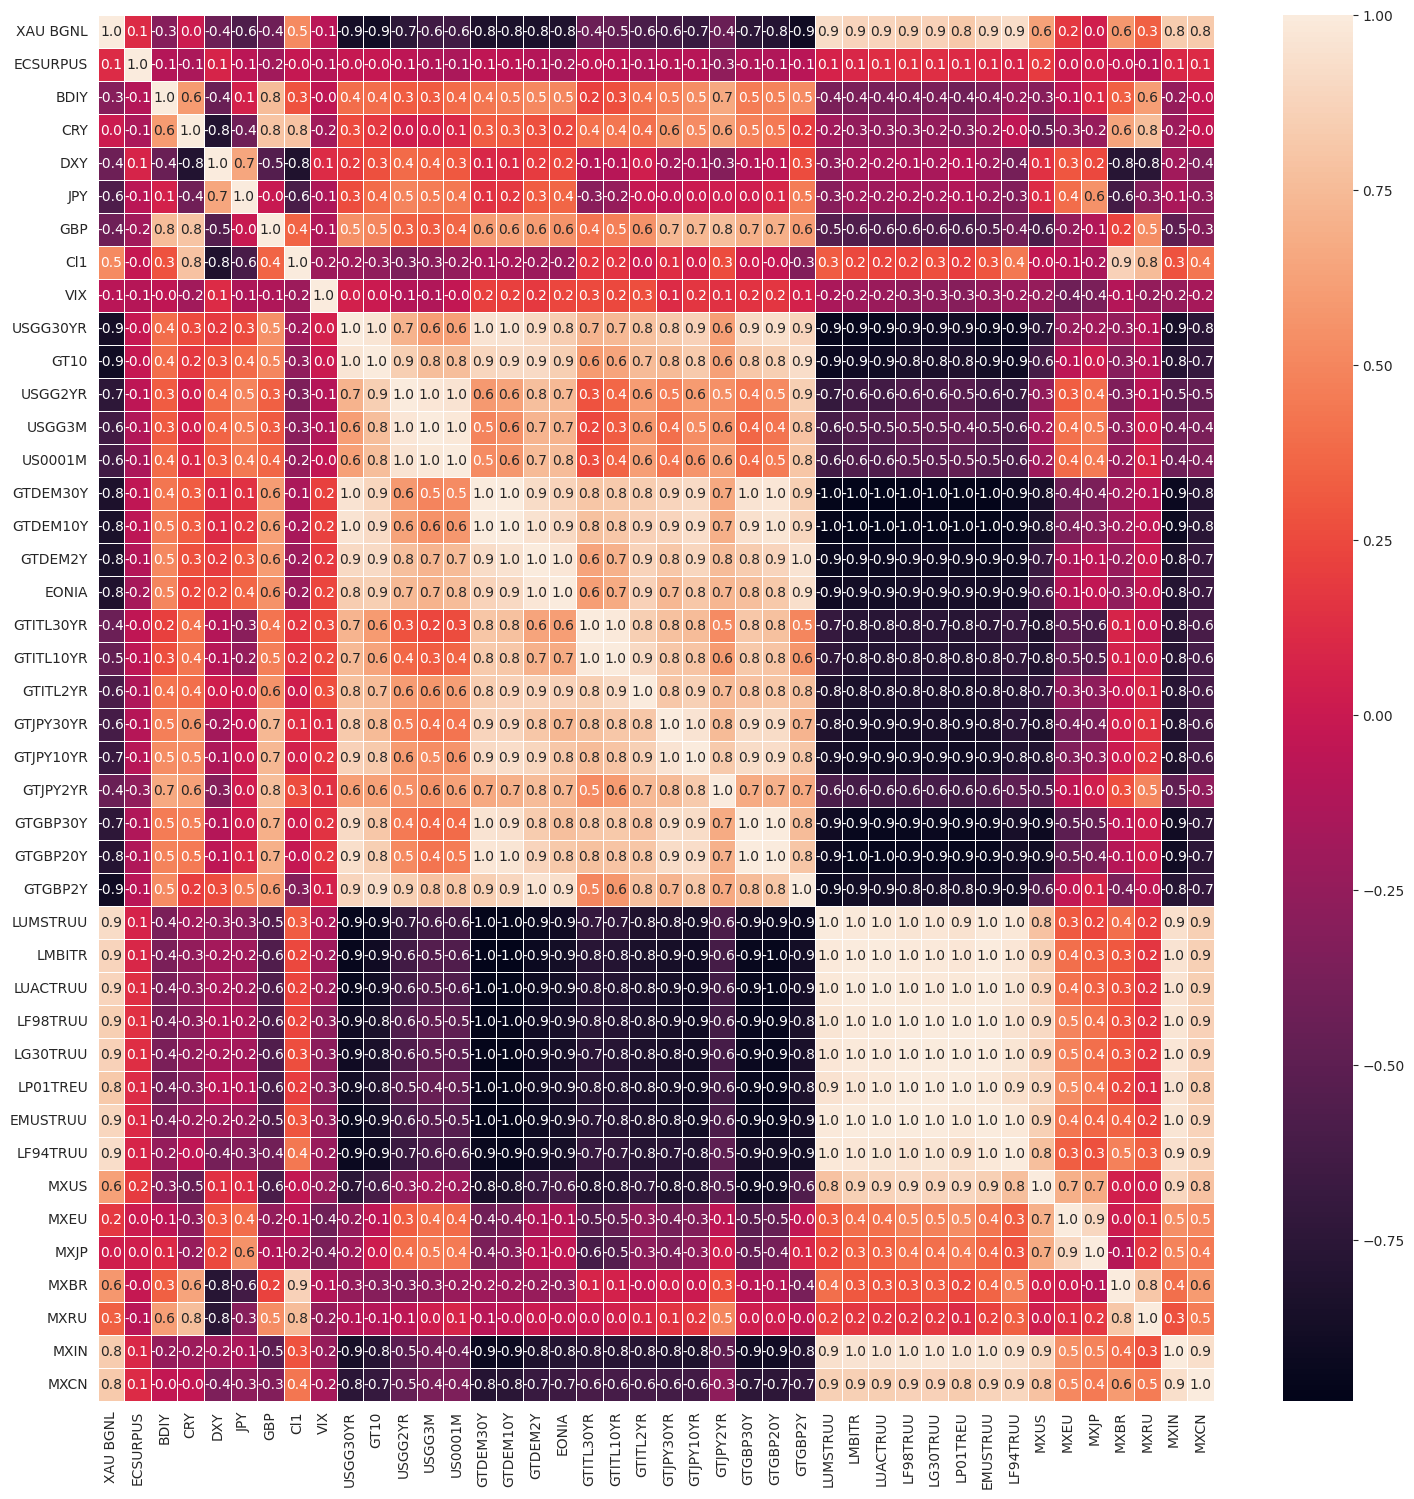

In [22]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features = correlation(features, 0.98)
len(set(corr_features))

11

In [25]:
corr_features

{'EMUSTRUU',
 'GTDEM10Y',
 'GTGBP20Y',
 'GTITL10YR',
 'LF94TRUU',
 'LF98TRUU',
 'LG30TRUU',
 'LMBITR',
 'LP01TREU',
 'LUACTRUU',
 'US0001M'}

In [26]:
# Assuming the actual column names are in uppercase:
#features = features[['VIX', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'LF98TRUU', 'LG30TRUU',
#       'LP01TREU', 'MXUS', 'MXEU', 'MXJP']]

# The actual column names are selected feature names from SelectKBest(score_func=f_classif, k=10)
# Assuming the actual column names are in uppercase:
features = features[selected_feature_names]

features


,VIX,GTITL30YR,GTITL10YR,GTITL2YR,LF98TRUU,LG30TRUU,LP01TREU,MXUS,MXEU,MXJP
0,22.50,6.321,5.777,4.495,546.04,305.057,116.4640,1416.12,127.75,990.59
1,21.50,6.459,5.889,4.535,545.68,305.303,117.2670,1428.79,129.50,993.98
2,23.02,6.281,5.760,4.511,546.70,306.181,117.9950,1385.93,126.48,974.83
3,23.45,6.188,5.710,4.540,547.38,305.997,120.5100,1385.31,129.19,1007.12
4,21.25,6.118,5.728,4.638,548.25,309.476,118.7910,1411.95,134.67,1034.58
...,...,...,...,...,...,...,...,...,...,...
1106,20.30,1.603,0.601,-0.415,2346.07,1500.919,427.7972,3800.77,140.32,1199.57
1107,19.61,1.670,0.679,-0.382,2352.95,1496.094,428.6578,3835.96,142.76,1206.29
1108,18.12,1.690,0.691,-0.377,2370.97,1510.465,430.6649,3955.16,144.13,1194.62
1109,16.65,1.756,0.748,-0.363,2371.86,1515.820,430.4087,4027.05,144.23,1197.06


In [27]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [30]:
X_train[0]

array([-0.96856785, -1.81858982, -1.71650701, -1.26224478,  0.90507121,
        0.94287845,  1.04356188,  0.63417262,  0.39687565,  0.04932911])

In [31]:
X_train[1]

array([ 0.09134821, -0.6232161 , -0.61842513, -1.02775343,  1.3140894 ,
        1.28883076,  1.25643812,  1.23483316,  0.56153128,  0.73679892])

In [32]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train= smote.fit_resample(X_train, y_train)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [34]:
lr_model=LogisticRegression(random_state=42)

In [35]:
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [36]:
lr_predictions=lr_model.predict(X_test)

In [37]:
lr_predictions

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [38]:
lr_accuracy=accuracy_score(y_test,lr_predictions)

In [39]:
lr_accuracy

0.8161434977578476

In [40]:
def evaluate_and_save_model(model,X_train,X_test,y_train,y_test, filename):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Accuracy: {model.__class__.__name__} Accuracy:{accuracy:.4f}")
  print(f"\nClassification_report:\n{classification_report(y_test,y_pred)}")
  print("=============")

  with open(filename,"wb") as file:
    pickle.dump(model,file)

  print(f"Model saved as {filename}")


In [41]:
xgb_model=xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")

dt_model=DecisionTreeClassifier(random_state=42)
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, "dt_model.pkl")

args={'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
rf_model=RandomForestClassifier(random_state=42, **args)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, "rf_model.pkl")

nb_model=GaussianNB()
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, "nb_model.pkl")

knn_model=KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, "knn_model.pkl")

svm_model=SVC(random_state=42, probability=True)
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, "svm_model.pkl")

Accuracy: XGBClassifier Accuracy:0.8520

Classification_report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       177
           1       0.62      0.72      0.67        46

    accuracy                           0.85       223
   macro avg       0.77      0.80      0.79       223
weighted avg       0.86      0.85      0.86       223

Model saved as xgb_model.pkl
Accuracy: DecisionTreeClassifier Accuracy:0.8251

Classification_report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       177
           1       0.56      0.76      0.64        46

    accuracy                           0.83       223
   macro avg       0.74      0.80      0.76       223
weighted avg       0.85      0.83      0.83       223

Model saved as dt_model.pkl
Accuracy: RandomForestClassifier Accuracy:0.8789

Classification_report:
              precision    recall  f1-score   support

           0       0.94 

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
evaluate_and_save_model(gb_model, X_train, X_test, y_train, y_test, "gb_model.pkl")


Accuracy: GradientBoostingClassifier Accuracy:0.8475

Classification_report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       177
           1       0.61      0.74      0.67        46

    accuracy                           0.85       223
   macro avg       0.77      0.81      0.78       223
weighted avg       0.86      0.85      0.85       223

Model saved as gb_model.pkl


In [43]:
'''
# write me a lstm net  in tensorflow training, prediction and save the weights

import tensorflow as tf
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined from the previous code

# Reshape data for LSTM (assuming each time step is a single feature)
#X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
#X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# We are assuming each timestep is a single feature, and adding a new dimension of size 1
# to represent the timesteps.
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# Define the LSTM model
#model = tf.keras.Sequential([
#    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
#    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
#])

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64, return_sequences=True),  # Added return_sequences=True here
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.LSTM(32),
    #tf.keras.layers.Dropout(0.5),
    tf.heras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


# Save the model's weights
model.save_weights("lstm_model_weights.weights.h5")

# To load the weights later:
# model.load_weights("lstm_model_weights.weights.h5")
'''

'\n# write me a lstm net  in tensorflow training, prediction and save the weights\n\nimport tensorflow as tf\nimport numpy as np\n\n# Assuming X_train, y_train, X_test, y_test are already defined from the previous code\n\n# Reshape data for LSTM (assuming each time step is a single feature)\n#X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])\n#X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])\n\n# We are assuming each timestep is a single feature, and adding a new dimension of size 1\n# to represent the timesteps.\nX_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  \nX_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])  \n\n\n# Define the LSTM model\n#model = tf.keras.Sequential([\n#    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),\n#    tf.keras.layers.Dense(1, activation=\'sigmoid\') # Output layer for binary classification\n#])\n\n# Define the LSTM model\nmodel = tf.keras.Sequential([\n    tf.keras.layers

## Hyperparameter Tuning

In [44]:
'''
# The python code to perform grid search to find the optimal hyperparamaters for the RandomForestClassifier model

# Define the parameter grid to search for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_model_grid_search = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=rf_model_grid_search, param_grid=param_grid_rf,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy for RandomForestClassifier
print("Best parameters found for RandomForestClassifier: ", grid_search_rf.best_params_)
print("Best accuracy found for RandomForestClassifier: ", grid_search_rf.best_score_)

# Get the best model from the grid search for RandomForestClassifier
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model on the test set for RandomForestClassifier
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy on test set for RandomForestClassifier: ", accuracy_rf)
'''

'\n# The python code to perform grid search to find the optimal hyperparamaters for the RandomForestClassifier model\n\n# Define the parameter grid to search for RandomForestClassifier\nparam_grid_rf = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Create a RandomForestClassifier\nrf_model_grid_search = RandomForestClassifier(random_state=42)\n\n# Create a GridSearchCV object for RandomForestClassifier\ngrid_search_rf = GridSearchCV(estimator=rf_model_grid_search, param_grid=param_grid_rf,\n                           scoring=\'accuracy\', cv=5, n_jobs=-1)\n\n# Fit the grid search to the training data\ngrid_search_rf.fit(X_train, y_train)\n\n# Print the best parameters and the corresponding accuracy for RandomForestClassifier\nprint("Best parameters found for RandomForestClassifier: ", grid_search_rf.best_params_)\nprint("Best accuracy found for RandomForestClassifier: ", g

In [45]:
'''
# The python code to perform grid search to find the optimal hyperparamaters for the XGBoost model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create an XGBoost classifier
xgb_model_grid_search = xgb.XGBClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model_grid_search, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)
'''

'\n# The python code to perform grid search to find the optimal hyperparamaters for the XGBoost model\n\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid to search\nparam_grid = {\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7],\n    \'n_estimators\': [50, 100, 200],\n    \'subsample\': [0.8, 1.0],\n    \'colsample_bytree\': [0.8, 1.0]\n}\n\n# Create an XGBoost classifier\nxgb_model_grid_search = xgb.XGBClassifier(random_state=42)\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(estimator=xgb_model_grid_search, param_grid=param_grid,\n                           scoring=\'accuracy\', cv=5, n_jobs=-1)\n\n# Fit the grid search to the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters and the corresponding accuracy\nprint("Best parameters found: ", grid_search.best_params_)\nprint("Best accuracy found: ", grid_search.best_score_)\n\n# Get the best model from the grid search\nbest_xgb_model = gr

In [46]:
feature_importance = xgb_model.feature_importances_
feature_names = features.columns

In [47]:
feature_importance

array([0.34537712, 0.08488767, 0.14684354, 0.07379918, 0.05572757,
       0.09536941, 0.04788377, 0.03579719, 0.0577332 , 0.05658139],
      dtype=float32)

In [48]:
feature_names

Index(['VIX', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'LF98TRUU', 'LG30TRUU',
       'LP01TREU', 'MXUS', 'MXEU', 'MXJP'],
      dtype='object')

In [49]:
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
    })

In [50]:
feature_importances_df

,feature,importance
0,VIX,0.345377
1,GTITL30YR,0.084888
2,GTITL10YR,0.146844
3,GTITL2YR,0.073799
4,LF98TRUU,0.055728
5,LG30TRUU,0.095369
6,LP01TREU,0.047884
7,MXUS,0.035797
8,MXEU,0.057733
9,MXJP,0.056581


In [51]:
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

In [52]:
feature_importances_df

,feature,importance
0,VIX,0.345377
2,GTITL10YR,0.146844
5,LG30TRUU,0.095369
1,GTITL30YR,0.084888
3,GTITL2YR,0.073799
8,MXEU,0.057733
9,MXJP,0.056581
4,LF98TRUU,0.055728
6,LP01TREU,0.047884
7,MXUS,0.035797


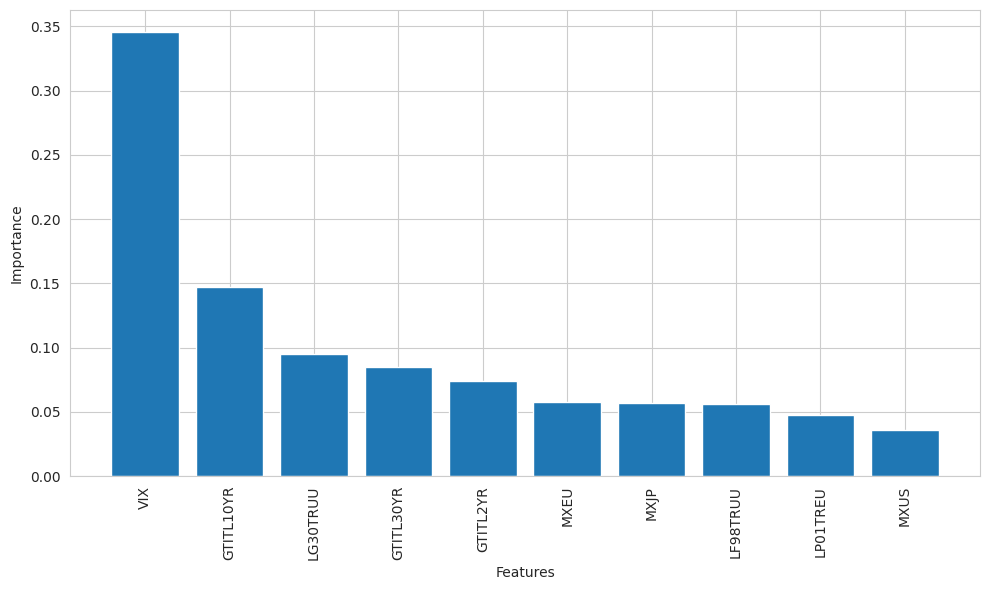

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df['feature'], feature_importances_df['importance'],)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [54]:
features

,VIX,GTITL30YR,GTITL10YR,GTITL2YR,LF98TRUU,LG30TRUU,LP01TREU,MXUS,MXEU,MXJP
0,22.50,6.321,5.777,4.495,546.04,305.057,116.4640,1416.12,127.75,990.59
1,21.50,6.459,5.889,4.535,545.68,305.303,117.2670,1428.79,129.50,993.98
2,23.02,6.281,5.760,4.511,546.70,306.181,117.9950,1385.93,126.48,974.83
3,23.45,6.188,5.710,4.540,547.38,305.997,120.5100,1385.31,129.19,1007.12
4,21.25,6.118,5.728,4.638,548.25,309.476,118.7910,1411.95,134.67,1034.58
...,...,...,...,...,...,...,...,...,...,...
1106,20.30,1.603,0.601,-0.415,2346.07,1500.919,427.7972,3800.77,140.32,1199.57
1107,19.61,1.670,0.679,-0.382,2352.95,1496.094,428.6578,3835.96,142.76,1206.29
1108,18.12,1.690,0.691,-0.377,2370.97,1510.465,430.6649,3955.16,144.13,1194.62
1109,16.65,1.756,0.748,-0.363,2371.86,1515.820,430.4087,4027.05,144.23,1197.06


In [55]:
# Converting 'Date' column to datetime

features['Day'] = pd.to_datetime(df['Data']).dt.day
features['Month'] = pd.to_datetime(df['Data']).dt.month
features['Year'] = pd.to_datetime(df['Data']).dt.year

<ipython-input-55-2bd2f588f986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Day'] = pd.to_datetime(df['Data']).dt.day
<ipython-input-55-2bd2f588f986>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Month'] = pd.to_datetime(df['Data']).dt.month
<ipython-input-55-2bd2f588f986>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [56]:
# drop the y column

#features=df.drop(['Data','Y'],axis=1)

In [57]:
features

,VIX,GTITL30YR,GTITL10YR,GTITL2YR,LF98TRUU,LG30TRUU,LP01TREU,MXUS,MXEU,MXJP,Day,Month,Year
0,22.50,6.321,5.777,4.495,546.04,305.057,116.4640,1416.12,127.75,990.59,11,1,2000
1,21.50,6.459,5.889,4.535,545.68,305.303,117.2670,1428.79,129.50,993.98,18,1,2000
2,23.02,6.281,5.760,4.511,546.70,306.181,117.9950,1385.93,126.48,974.83,25,1,2000
3,23.45,6.188,5.710,4.540,547.38,305.997,120.5100,1385.31,129.19,1007.12,1,2,2000
4,21.25,6.118,5.728,4.638,548.25,309.476,118.7910,1411.95,134.67,1034.58,8,2,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,20.30,1.603,0.601,-0.415,2346.07,1500.919,427.7972,3800.77,140.32,1199.57,23,3,2021
1107,19.61,1.670,0.679,-0.382,2352.95,1496.094,428.6578,3835.96,142.76,1206.29,30,3,2021
1108,18.12,1.690,0.691,-0.377,2370.97,1510.465,430.6649,3955.16,144.13,1194.62,6,4,2021
1109,16.65,1.756,0.748,-0.363,2371.86,1515.820,430.4087,4027.05,144.23,1197.06,13,4,2021


In [58]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [59]:
X_train

,VIX,GTITL30YR,GTITL10YR,GTITL2YR,LF98TRUU,LG30TRUU,LP01TREU,MXUS,MXEU,MXJP,Day,Month,Year
865,11.66,2.070,1.118,-0.076,1751.00,1166.080,350.4370,2078.64,116.35,796.57,9,8,2016
993,20.80,3.602,2.739,0.323,1979.83,1295.461,374.0820,2506.74,119.80,934.30,22,1,2019
928,11.16,3.189,2.052,-0.253,1952.49,1305.173,381.0200,2445.61,131.54,1043.38,24,10,2017
780,14.80,3.240,1.941,0.521,1618.18,1066.546,326.5960,1986.73,117.28,873.18,23,12,2014
734,19.11,4.634,3.782,0.856,1591.31,1063.997,308.5660,1680.50,108.35,704.02,4,2,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,52.37,5.126,4.460,3.287,602.46,406.618,100.3590,862.02,69.71,511.33,16,12,2008
121,21.94,5.757,5.348,4.162,561.72,331.350,93.0400,984.90,101.50,678.70,7,5,2002
1044,12.39,2.461,1.393,-0.033,2195.73,1421.202,414.0670,3130.40,140.90,1052.83,14,1,2020
1095,25.34,1.417,0.565,-0.406,2338.55,1515.266,420.9469,3640.58,132.78,1098.30,5,1,2021


In [60]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [61]:
xgboost_model = xgb.XGBClassifier(random_state=42)

evaluate_and_save_model(xgboost_model, X_train, X_test, y_train, y_test, "xgboost-featureEgineered.pkl")

Accuracy: XGBClassifier Accuracy:0.8834

Classification_report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       177
           1       0.76      0.63      0.69        46

    accuracy                           0.88       223
   macro avg       0.84      0.79      0.81       223
weighted avg       0.88      0.88      0.88       223

Model saved as xgboost-featureEgineered.pkl


In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
smote = SMOTE(random_state=42)

In [64]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [65]:
evaluate_and_save_model(xgboost_model, X_resampled, X_test, y_resampled, y_test, "xgboost-SMOTE.pkl")

Accuracy: XGBClassifier Accuracy:0.8834

Classification_report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       177
           1       0.73      0.70      0.71        46

    accuracy                           0.88       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.88      0.88      0.88       223

Model saved as xgboost-SMOTE.pkl


In [66]:
'''
args={'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
rf_model=RandomForestClassifier(random_state=42, **args)
evaluate_and_save_model(rf_model, X_resampled, X_test, y_resampled, y_test, "rf_model-SMOTE.pkl")

knn_model=KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_resampled, X_test, y_resampled, y_test, "knn_model-SMOTE.pkl")

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
evaluate_and_save_model(gb_model, X_resampled, X_test, y_resampled, y_test, "gb_model-SMOTE.pkl")
'''

'\nargs={\'max_depth\': None, \'min_samples_leaf\': 1, \'min_samples_split\': 2, \'n_estimators\': 50}\nrf_model=RandomForestClassifier(random_state=42, **args)\nevaluate_and_save_model(rf_model, X_resampled, X_test, y_resampled, y_test, "rf_model-SMOTE.pkl")\n\nknn_model=KNeighborsClassifier()\nevaluate_and_save_model(knn_model, X_resampled, X_test, y_resampled, y_test, "knn_model-SMOTE.pkl")\n\nfrom sklearn.ensemble import GradientBoostingClassifier\n\ngb_model = GradientBoostingClassifier(random_state=42)\nevaluate_and_save_model(gb_model, X_resampled, X_test, y_resampled, y_test, "gb_model-SMOTE.pkl")\n'

In [67]:
from sklearn.ensemble import VotingClassifier

In [68]:
'''
voting_clf = VotingClassifier(estimators=[('xgb', xgb.XGBClassifier(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)), ('svm', SVC(random_state=42, probability=True))],
 voting='hard'
 )
 '''

voting_clf = VotingClassifier(estimators=[('gboosting', GradientBoostingClassifier(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)), ('knn', KNeighborsClassifier())],
 voting='hard'
 )

In [69]:
evaluate_and_save_model(voting_clf, X_resampled, X_test, y_resampled, y_test, "voting_clf.pkl")

Accuracy: VotingClassifier Accuracy:0.8924

Classification_report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       177
           1       0.73      0.76      0.74        46

    accuracy                           0.89       223
   macro avg       0.83      0.84      0.84       223
weighted avg       0.89      0.89      0.89       223

Model saved as voting_clf.pkl


# Milestone 3: Web App Project 10 Market Anomaly Detection

In [70]:
!pip install groq
!pip install langchain-groq # Install the integration package for Groq and LangChain
!pip install langchain_groq
!pip install longchain --upgrade
!pip install openai
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 2.8 MB/s eta 0:00:00


In [71]:
from langchain_groq import ChatGroq

In [72]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [73]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173912 sha256=3dafdb11f295ca0759e26fe2b871ed9b4c213cfcec46025c8cd7cad51c3aa50e
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [74]:
import os # Import the os module
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get("GOOGLE_API_KEY")
os.environ['GROQ_API_KEY'] = userdata.get("GROQ_API_KEY")
os.environ['PINECONE_API_KEY'] = userdata.get("PINECONE_API_KEY")

In [75]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [76]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [77]:
def run_streamlit():
    import os # Import the os module
    os.system("streamlit run /content/app.py --server.port 8501")

In [78]:
%%writefile utils.py

import plotly.graph_objects as go

def create_gauge_chart(probability):
  # Determine color based on churn probability
  if probability < 0.3:
    color = "green"
  elif probability < 0.6:
    color = "yellow"
  else:
    color = "red"

  # Create a gauge chart
  fig = go.Figure(go.Indicator(
      mode = "gauge+number",
      value = probability * 100,
      domain = {
          'x': [0, 1],
          'y': [0, 1]},
      title = {
          'text': "Churn Probability",
          'font': {
            'size': 24,
            'color': "white"}},
      number = {'font': {
                         'size': 48,
                         'color': "white"}},
      gauge = {'axis': {'range': [0, 100],
                        'tickwidth': 1,
                        'tickcolor': "white"},
               'bar': {
                   'color':color},
               'bgcolor': 'rgba(0,0,0,0)',
               'borderwidth': 2,
               'bordercolor': 'white',
               'steps': [
               {'range': [0, 30], 'color': 'rgba(0, 255, 0, 0.3)'},
               {'range': [30, 60], 'color': 'rgba(255, 255, 0, 0.3)'},
               {'range': [60, 100], 'color': 'rgba(255, 0, 0, 0.3)'}],
               'threshold': {
               'line': {
                   'color': "white",
                   'width': 4
                   },
               'thickness': 0.75,
               'value': 100
               }

            }))

  # Update chart layout
  fig.update_layout(
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    font={'color': "white"},
    width=400,
    height=300,
    margin=dict(l=20, r=20, t=50, b=20))


  return fig


def create_model_probability_chart(probabilities):
    models = list(probabilities.keys())
    probs = list(probabilities.values())

    fig = go.Figure(data=[
        go.Bar(y=models,
               x=probs,
               orientation='h',
               text=[f'{p:.2%}' for p in probs],
               textposition='auto')
    ])

    fig.update_layout(title='Abnormal risk/crisis/crash Probability by Model',
                      yaxis_title='Models',
                      xaxis_title='Probability',
                      xaxis=dict(tickformat='0%', range=[0, 1]),
                      height=400,
                      margin=dict(l=20, r=20, t=40, b=20))

    return fig





Writing utils.py


In [79]:
%%writefile /content/app.py
from google.colab import userdata
#userdata.get('GROQ_API_KEY')

import streamlit as st
import utils as ut

import streamlit as st
import pandas as pd
import pickle
import numpy as np
import os
from openai import OpenAI

from sklearn.ensemble import RandomForestClassifier
from backtesting import Backtest
from backtesting import Strategy

#import streamlit as st
#import pandas as pd
#import pickle
#import numpy as np
#import os
#from openai import OpenAI

#st.title("Customer Churn Prediction")


#client=OpenAI(base_url='https://api.groq.com/openai/v1',
#              api_key=os.environ.get('GROQ_API_KEY'))

client=OpenAI(base_url='https://api.groq.com/openai/v1',
              api_key=os.getenv('GROQ_API_KEY'))



def load_model(filename):
  with open(filename,'rb') as file:
      return pickle.load(file)

xgboost_model=load_model('/content/xgb_model.pkl')
naive_bayes_model=load_model('/content/nb_model.pkl')
random_forest_model=load_model('/content/rf_model.pkl')
decision_tree_model=load_model('/content/dt_model.pkl')
svm_model=load_model('/content/svm_model.pkl')
knn_model=load_model('/content/knn_model.pkl')
#voting_classifier_model=load_model('/content/voting_clf.pkl')
#xgboost_SMOTE_model=load_model('/content/xgboost-SMOTE.pkl')
#xgboost_featureEgineered_model=load_model('/content/xgboost-featureEgineered.pkl')

# this is in plus algorithm for tutorial
gb_model=load_model('/content/gb_model.pkl')

def prepare_input(VIX,GTITL30YR,GTITL10YR,
                  GTITL2YR,LF98TRUU,LG30TRUU,LP01TREU,MXUS,MXEU,MXJP):
  input_dict={
      'VIX':VIX,
      'GTITL30YR':GTITL30YR,
      'GTITL10YR':GTITL10YR,
      'GTITL2YR':GTITL2YR,
      'LF98TRUU':LF98TRUU,
      'LG30TRUU':LG30TRUU,
      'LP01TREU':LP01TREU,
      'MXUS':MXUS,
      'MXEU':MXEU,
      'MXJP':MXJP
  }
  input_df=pd.DataFrame([input_dict])
  return input_df, input_dict


def make_prediction(input_df, input_dict):
    probabilities={'XGBoost':xgboost_model.predict_proba(input_df)[0][1],
                   'Random Forest':random_forest_model.predict_proba(input_df)[0][1],
                   'K-Nearest Neighbors':knn_model.predict_proba(input_df)[0][1],
                   'Support Vector Machine':svm_model.predict_proba(input_df)[0][1],
                   'Gradient Boosting':gb_model.predict_proba(input_df)[0][1],
                   'Decision Tree':decision_tree_model.predict_proba(input_df)[0][1],
                   'Naive Bays':naive_bayes_model.predict_proba(input_df)[0][1],


    }
    avg_probability=np.mean(list(probabilities.values()))

    st.markdown('## Model Probabilities')
    for model, prob in probabilities.items():
      st.write(f"{model} {prob}")
    st.write(f"Average Probability: {avg_probability}")

    col1, col2 = st.columns(2)

    with col1:
       fig = ut.create_gauge_chart(avg_probability)
       st.plotly_chart(fig, use_container_width=True)
       st.write(f"The financial market data has a {avg_probability:.2%} probability of abnormal risk/crisis/crash.")

    with col2:
       fig_probs = ut.create_model_probability_chart(probabilities)
       st.plotly_chart(fig_probs, use_container_width=True)

    return avg_probability


def explain_prediction(probability, input_dict, data):

  prompt = f"""
  
  You are a data scientist specializing in market anomaly detection, with expertise in interpreting and exploring the predictions of machine learning models. Your model predicts that the date **{date}** has a **{round(probability*100, 1)}%** probability of experiencing abnormal risk, crisis, or crash, based on the financial market data provided below.

  ### Financial Market Data:
  {input_dict}

  ### Top 10 Most Important Features for Predicting Abnormal Risk/Crisis/Crash:
  | Feature      | Importance |
  |--------------|------------|
  | VIX          | 0.345377   |
  | GTITL30YR    | 0.084888   |
  | GTITL10YR    | 0.146844   |
  | GTITL2YR     | 0.073799   |
  | LF98TRUU     | 0.055728   |
  | LG30TRUU     | 0.095369   |
  | LP01TREU     | 0.047884   |
  | MXUS         | 0.035797   |
  | MXEU         | 0.057733   |
  | MXJP         | 0.056581   |

  ### Summary Statistics:
  #### Abnormal Risk/Crisis/Crash (Y = 1):
  {df[df['Y']==1].describe()}

  #### Non-Abnormal Risk/Crisis/Crash (Y = 0):
  {df[df['Y']==0].describe()}

  ### Task:
  Based on the financial market data, summary statistics, and feature importances:
  1. If the probability is greater than 40%, generate a concise, three-sentence explanation of why abnormal risk, crisis, or crash is likely.
  2. If the probability is less than 40%, generate a concise, three-sentence explanation of why abnormal risk, crisis, or crash is unlikely.

  ### Important Guidelines:
  - Do not mention the probability, the machine learning model, or explicitly refer to features as being derived from the model.
  - The explanation must be grounded in the financial market data, summary statistics, and provided feature importance rankings.

  ### Additional Information About Features:
  | Name                              | Currency | Bloomberg Ticker |
  |-----------------------------------|----------|------------------|
  | Gold Spot $/Oz                    | XAU      | XAU BGNL         |
  | Bloomberg ECO US Surprise Index   | N/A      | ECSURPUS         |
  | Baltic Dry Index                  | USD      | BDIY             |
  | TR/CC CRB ER Index                | USD      | CRY              |
  | DOLLAR INDEX SPOT                 | USD      | XY               |
  | Japanese Yen Spot                 | JPY      | JPY              |
  | British Pound Spot                | GBP      | GBP              |
  | Generic 1st 'CL' Future           | USD      | Cl1              |
  | Cboe Volatility Index             | USD      | VIX              |
  | US Generic Govt 30 Yr             | USD      | SGG30YR          |
  | US TREASURY N/B                   | USD      | GT10             |
  | US Generic Govt 2 Yr              | USD      | USGG2YR          |
  | US Generic Govt 3 Mth             | USD      | USGG3M           |
  | ICE LIBOR USD 1 Month             | USD      | US0001M          |
  | BUNDESREPUB. DEUTSCHLAND          | EUR      | GTDEM30Y         |
  | BUONI POLIENNALI DEL TES (Italy)  | EUR      | GTITL30YR        |
  | MSCI USA                          | USD      | MXUS             |
  | MSCI Europe                       | EUR      | MXEU             |
  | MSCI Japan                        | JPY      | MXJP             |

  """


  raw_response=client.chat.completions.create(
      model="llama-3.2-3b-preview", #model="llama-3.3-70b-versatile",#model="llama-3.2-3b-preview",
      messages=[
          {"role":"user",
           "content":prompt
           }])

  return raw_response.choices[0].message.content

def investment_strategy(probability, input_dict, explanation,data):
  '''
  df=pd.read_csv('/content/FinancialMarketData.csv')

  y = df['Y']
  X = df[['VIX', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR', 'LF98TRUU', 'LG30TRUU',
     'LP01TREU', 'MXUS', 'MXEU', 'MXJP']]


  # Machine learning model
  model = RandomForestClassifier(random_state=42)
  model.fit(X, y)

  # Model evaluation
  y_pred = model.predict(X)
  error = y - y_pred
  error2 = error ** 2

  MSE = error2.mean()
  RMSE = MSE ** 0.5

  # Create investment strategy

  class MLStrategy(Strategy):
    def init(self):
        self.model = model

    def next(self):
        X_today = self.data.df.iloc[[-1]]
        y_tomorrow = self.model.predict(X_today)

        if y_tomorrow > RMSE:
            self.buy()
        elif y_tomorrow < -RMSE:
            self.sell()
        else:
            pass


  # Backtest with trading conditions
  bt = Backtest(
  X, MLStrategy, cash=1_000, commission=.002,
  exclusive_orders=True, trade_on_close=True
  )

  results = bt.run()
  '''

  prompt=f"""You are a financial market data analyst in investment strategy/investment strategies and/or
  a data-driven investment strategy/data-driven investment strategies.
  You are responsible is to show investment strategy/investment strategies and/or a data-driven investment strategy to customers.

  Your noticed at date {data} has a
  {round(probability*100, 1)}% probability of abnormal risk/crisis/crash.

  Here is the information:
  {input_dict}

  Here is some explanation as to why the customer might be at abnormal risk/crisis/crash:
  {explanation}

  Generate a investment strategy to the customer based on there information, asking them to say
  if they are at the abnormal risk/crisis/crash.

  Make sure to list investment strategies based on their information
  in bullet point format. Don't ever mention the probability of abnormal risk/crisis/crash, or
  the machine learning model to the customer.

  """
  print("\n\n INVESTMENT STRATEGY PROMPT", prompt)

  raw_response=client.chat.completions.create(
      model="mixtral-8x7b-32768", #model="llama-3.3-70b-versatile", #model="llama-3.2-3b-preview",
      messages=[
          {"role":"user",
           "content":prompt
           }])

  return raw_response.choices[0].message.content


st.title("Market Anomaly Detection")

df=pd.read_csv('/content/FinancialMarketData.csv')
#df=pd.read_csv('/content/FinancialMarketData.xlsx - EWS.csv')

#data=[f"{row['Data']}-{row['Data']}" for _, row in df.iterrows()]
data=[f"{row['Data']}" for _, row in df.iterrows()]

selected_data = st.selectbox("Select a data:",data)

if selected_data:

  selected_data= df.loc[df['Data'] == selected_data].iloc[0]

  print("Selected Data",selected_data)

  col1,col2=st.columns(2)

  with col1:
    VIX=st.number_input("VIX",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['VIX']))

    GTITL30YR=st.number_input("GTITL30YR",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['GTITL30YR']))

    GTITL10YR=st.number_input("GTITL10YR",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['GTITL10YR']))

    GTITL2YR=st.number_input("GTITL2YR",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['GTITL2YR']))

    LF98TRUU=st.number_input("LF98TRUU",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['LF98TRUU']))


  with col2:
    LG30TRUU=st.number_input("LG30TRUU",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['LG30TRUU']))

    LP01TREU=st.number_input("LP01TREU",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['LP01TREU']))

    MXUS=st.number_input("MXUS",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['MXUS']))

    MXEU=st.number_input("MXEU",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['MXEU']))

    MXJP=st.number_input("MXJP",
                        min_value=0.0,#max_value=850,
                        value=float(selected_data['MXJP']))



input_df,input_dict=prepare_input(VIX,GTITL30YR,GTITL10YR,
                                  GTITL2YR,LF98TRUU,LG30TRUU,LP01TREU,MXUS,MXEU,MXJP)

avg_probability=make_prediction(input_df,input_dict)

explanation=explain_prediction(avg_probability,input_dict,
                    selected_data['Data'])

st.markdown("===")
st.subheader("Explanation of Prediction")
st.markdown(explanation)


invest_strategy=investment_strategy(avg_probability,input_dict,explanation,
                    selected_data['Data'])

st.markdown("===")
st.subheader("Investment Strategy")
st.markdown(invest_strategy)




Writing /content/app.py


In [80]:
thread = Thread(target=run_streamlit)
thread.start()

In [81]:
# Disconnect all existing tunnels
for tunnel in ngrok.get_tunnels():
    ngrok.disconnect(tunnel.public_url)

# Now connect your new tunnel
public_url = ngrok.connect(addr='8501', proto='http')

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://08fc-104-155-210-171.ngrok-free.app" -> "http://localhost:8501"


In [82]:
'''
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
    ngrok.disconnect(tunnel.public_url)
'''

'\ntunnels = ngrok.get_tunnels()\nfor tunnel in tunnels:\n    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config[\'addr\']}")\n    ngrok.disconnect(tunnel.public_url)\n'

# Milestone 2

In [83]:
#!/bin/bash
!kaggle datasets download amirhoseinmousavian/nvidia-corporation-nvda-stock-price
!unzip /content/nvidia-corporation-nvda-stock-price.zip
!rm /content/nvidia-corporation-nvda-stock-price.zip



Dataset URL: https://www.kaggle.com/datasets/amirhoseinmousavian/nvidia-corporation-nvda-stock-price
License(s): unknown
  0% 0.00/32.3k [00:00<?, ?B/s]
100% 32.3k/32.3k [00:00<00:00, 3.81MB/s]
Archive:  /content/nvidia-corporation-nvda-stock-price.zip
  inflating: NVDA(2).csv             


In [84]:
!pip install backtesting
!pip install bokeh==2.4.3
# backtesting.py ploting function not working:
# https://stackoverflow.com/questions/74334910/backtesting-py-ploting-function-not-working


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.6.2
    Uninstalling bokeh-3.6.2:
      Successfully uninstalled bokeh-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
holoviews 1.20.0 requires bokeh>=3.1, but you have bokeh 2.4.3 which is incompatible.
panel 1.5.5 requires bokeh<3.7.0,>=3.5.0, but you have bokeh 2.4.3 which is incompatible.


In [85]:
#Backtesting with ML-based investment strategies:
# https://datons.ai/backtesting-with-machine-learning-based-investment-strategies/
#Data
import pandas as pd
import yfinance as yf

#df = yf.download('NVDA')
#df.to_csv('NVDA_data.csv')


df = pd.read_csv('/content/NVDA(2).csv', index_col='Date', parse_dates=True)

# Daily return
# Preprocess and analyze stock returns with Python:
# https://datons.ai/preprocess-and-analyze-stock-returns-with-python/
#df['Return Daily'] = df['Adj Close'].pct_change()
df['Change Tomorrow/Return Daily'] = df['Adj Close'].pct_change()
df.head()
df.dropna(inplace=True)
df.head()


,Open,High,Low,Close,Adj Close,Volume,Change Tomorrow/Return Daily
Date,,,,,,,
2019-05-24,37.020000,37.375000,36.220001,36.287498,36.041054,35758400,-0.014730
2019-05-28,36.465000,36.794998,35.812500,35.832500,35.589134,42835600,-0.012539
2019-05-29,35.352501,35.705002,34.735001,35.084999,34.846722,55980000,-0.020861
2019-05-30,35.077499,35.437500,34.392502,34.777500,34.580738,39430000,-0.007633
2019-05-31,34.285000,34.962502,33.847500,33.865002,33.673405,38972000,-0.026238


In [86]:
#Feature selection
target = 'Change Tomorrow/Return Daily'
y = df[target]
X = df.drop(columns=target)

# Machine learning model
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=10)
model.fit(X, y)

# Model evaluation
y_pred = model.predict(X)
error = y - y_pred
error2 = error ** 2

MSE = error2.mean()
RMSE = MSE ** 0.5

# Create investment strategy
from backtesting import Strategy

class MLStrategy(Strategy):
    def init(self):
        self.model = model

    def next(self):
        X_today = self.data.df.iloc[[-1]]
        y_tomorrow = self.model.predict(X_today)

        if y_tomorrow > RMSE:
            self.buy()
        elif y_tomorrow < -RMSE:
            self.sell()
        else:
            pass


# Backtest with trading conditions
from backtesting import Backtest

bt = Backtest(
  X, MLStrategy, cash=1_000, commission=.002,
  exclusive_orders=True, trade_on_close=True
)

results = bt.run()
#results

# Visualize backtest simulation
#bt.plot()


/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '
<ipython-input-86-76ff7a954d4f>:42: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


In [87]:
# Backtest with trading conditions
from backtesting import Backtest

bt = Backtest(
  X, MLStrategy, cash=1_000, commission=.002,
  exclusive_orders=True, trade_on_close=True
)

results = bt.run()
# Display results in a DataFrame for better organization
results = pd.DataFrame([results])
# Transpose the DataFrame for easier reading of statistics
results = results.T
results.columns = ['Backtest Value']
results

<ipython-input-87-dde8c797362f>:4: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


,Backtest Value
Start,2019-05-24 00:00:00
End,2024-05-23 00:00:00
Duration,1826 days 00:00:00
Exposure Time [%],99.444003
Equity Final [$],2882.119808
Equity Peak [$],2895.199763
Return [%],188.211981
Buy & Hold Return [%],2818.1361
Return (Ann.) [%],23.599136
Volatility (Ann.) [%],63.842277


In [88]:
# Visualize backtest simulation
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='1407', ...)

Model RMSE: 1.3411831318210758
Volatility: 0.14465748276513624
Investment Allocation: 0.9276712586174318
Model RMSE: 1.3362426058865848
Volatility: 0.5343439477647582
Investment Allocation: 0.7328280261176209
Model RMSE: 1.2229120952299841
Volatility: 0.32415663248089194
Investment Allocation: 0.837921683759554
Model RMSE: 1.2482407432813287
Volatility: 0.22391143130373978
Investment Allocation: 0.8880442843481301
Model RMSE: 1.2126138111719253
Volatility: 0.31686110207853463
Investment Allocation: 0.8415694489607327
Model RMSE: 1.4352039426390675
Volatility: 0.21145098695542705
Investment Allocation: 0.8942745065222865
Model RMSE: 1.1276107800696988
Volatility: 0.43676444416940136
Investment Allocation: 0.7816177779152993
Model RMSE: 0.8336605861700699
Volatility: 0.403890571648022
Investment Allocation: 0.798054714175989
Model RMSE: 1.0886427321148628
Volatility: 0.1570133889601378
Investment Allocation: 0.9214933055199311
Model RMSE: 0.4468137320898314
Volatility: 0.2404938603903973

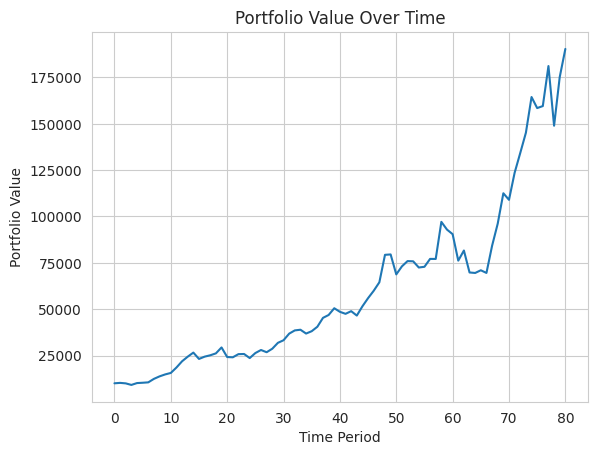

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Example model, can be replaced
from sklearn.metrics import mean_squared_error

# Sample Data (Replace with your actual data)
np.random.seed(0)
data = {
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Target': 2 * np.random.rand(100) + 3 * np.random.rand(100) + np.random.normal(0, 0.2, 100)
}
df = pd.DataFrame(data)

def train_model(df):
    """Trains a predictive model."""
    X = df[['Feature1', 'Feature2']]  # Features
    y = df['Target']  # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()  # Replace with your preferred model (e.g., RandomForestRegressor, XGBoost)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Model RMSE: {rmse}")
    return model

def generate_predictions(model, new_data):
    """Generates predictions using the trained model."""
    predictions = model.predict(new_data)
    return predictions

def investment_strategy(df, model, risk_tolerance=0.5, lookback_period=10):
    """
    Implements a data-driven investment strategy.

    Args:
        df: Pandas DataFrame with historical data.
        model: Trained predictive model.
        risk_tolerance: A value between 0 and 1 representing risk aversion (0: very risk-averse, 1: very risk-seeking).
        lookback_period: Number of past periods to consider for volatility calculation.

    Returns:
        A pandas Series of investment allocations (e.g., 0.8 means 80% invested).
    """

    # Simulate new data for demonstration (in real use, this would be new, unseen data)
    new_data = df[['Feature1', 'Feature2']].iloc[-lookback_period:]
    predictions = generate_predictions(model, new_data)

    # Calculate volatility (standard deviation of predictions over the lookback period)
    volatility = np.std(predictions)

    # Simple strategy: Adjust investment based on volatility and risk tolerance
    investment_allocation = 1 - (volatility * (1 - risk_tolerance))
    investment_allocation = np.clip(investment_allocation, 0, 1) # Ensure allocation is between 0 and 1

    print(f"Volatility: {volatility}")
    print(f"Investment Allocation: {investment_allocation}")

    return investment_allocation


# Example Usage:
trained_model = train_model(df)

# Demonstrate investment strategy with a single allocation
investment_allocation = investment_strategy(df, trained_model)

# Creating a series of investment allocations over time (more realistic)
investment_allocations = []
for i in range(len(df) - 20): # Example: calculate allocations over a rolling window
    sub_df = df.iloc[i:i + 20]
    sub_model = train_model(sub_df) # Retrain on every window for better adaptivity
    allocation = investment_strategy(sub_df, sub_model)
    investment_allocations.append(allocation)

print("\nSeries of investment allocations:")
print(investment_allocations)


# Backtesting (Simplified Example)
initial_capital = 10000
portfolio_value = [initial_capital]
for allocation in investment_allocations:
    # Simulate a return (replace with your actual return data or prediction)
    simulated_return = np.random.normal(0.05, 0.1) # Example: 5% average return with 10% std dev
    portfolio_value.append(portfolio_value[-1] + (portfolio_value[-1] * allocation * simulated_return))

import matplotlib.pyplot as plt
plt.plot(portfolio_value)
plt.title("Portfolio Value Over Time")
plt.xlabel("Time Period")
plt.ylabel("Portfolio Value")
plt.show()